# Polynomial, Linear and SVR Baseline Models

These will be a simple regression baseline models to have an inference point. 

# Data

As our dataset we will use the WORLD-OWID-Features dataset, which I extracted from the normal WORLD-OWID dataset.

you can see the feature engineering in the following notebook. sharable link: http://localhost:8888/lab/tree/Feature%20engineering.ipynb

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataSets /WORLD-OWID-Features-Yearly')

In [3]:
df.head()

,year,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,1880-01-01,0.0,853.705,838.340,256.309556,1814.698707,3100.721,15.364,82.069576
1,1881-01-01,0.0,882.405,865.162,256.309556,1814.698707,3096.935,17.242,82.069576
2,1882-01-01,0.0,931.922,912.817,256.309556,0.165000,3159.833,18.939,82.069576
3,1883-01-01,0.0,991.032,974.149,256.309556,0.381000,3220.534,16.502,82.069576
4,1884-01-01,0.0,1002.174,982.679,256.309556,1.172000,3240.197,18.323,82.069576


In [4]:
df.set_index('year', inplace=True) #Must be true 
df.index = pd.to_datetime(df.index)

We will try to predict and visualize the influences each industry has on the total amount of co2 emissions.  

# Splitting our Data

In [5]:
X = df.drop(['co2'], axis=1)
Y = df['co2']

In [6]:
'''train_start = pd.to_datetime('1880-01-01')
train_end = pd.to_datetime('2000-12-31')
val_start = pd.to_datetime('2001-01-01')
val_end = pd.to_datetime('2011-12-31')
test_start = pd.to_datetime('2012-01-01')
test_end = pd.to_datetime('2021-01-01')

# Subset the DataFrame based on the split points
X_train = df.loc[train_start:train_end].drop(['co2'], axis=1)
y_train = df.loc[train_start:train_end, 'co2']

X_val = df.loc[val_start:val_end].drop(['co2'], axis=1)
y_val = df.loc[val_start:val_end, 'co2']

X_test = df.loc[test_start:test_end].drop(['co2'], axis=1)
y_test = df.loc[test_start:test_end, 'co2']'''

"train_start = pd.to_datetime('1880-01-01')\ntrain_end = pd.to_datetime('2000-12-31')\nval_start = pd.to_datetime('2001-01-01')\nval_end = pd.to_datetime('2011-12-31')\ntest_start = pd.to_datetime('2012-01-01')\ntest_end = pd.to_datetime('2021-01-01')\n\n# Subset the DataFrame based on the split points\nX_train = df.loc[train_start:train_end].drop(['co2'], axis=1)\ny_train = df.loc[train_start:train_end, 'co2']\n\nX_val = df.loc[val_start:val_end].drop(['co2'], axis=1)\ny_val = df.loc[val_start:val_end, 'co2']\n\nX_test = df.loc[test_start:test_end].drop(['co2'], axis=1)\ny_test = df.loc[test_start:test_end, 'co2']"

In [7]:
#print(X_train.shape)
#print(y_train.shape)
#print(X_val.shape)
#print(y_val.shape)
#print(X_test.shape)
#print(y_test.shape)

In [28]:
from sklearn.model_selection import train_test_split

# Assuming your features are in X and targets are in y
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling Data

In [9]:
# Optional 

# from sklearn.preprocessing import StandardScaler

# (By  scaling our features we can make our models more robust against outliers.) 

# Since the dataset is already the amount of how much each industry contributes to 
# the total co2 comissions, we must not scale our data. !!

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test) 

# Evaluation Function 

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [11]:
# Calculates and returns MAE, RMSE, R2, SMAPE, MAPE 

def evaluate_model(y_true, y_pred):
   
    mae = mean_absolute_error(y_true, y_pred)
    print("(MAE):", mae)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("(RMSE):", rmse)

    r2 = r2_score(y_true, y_pred)
    print("(R2) score:", r2)

    mape = mean_absolute_percentage_error(y_true, y_pred)
    print("(MAPE)) =", mape)

    #def smape(y_true, y_pred):
        #return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

    #smape_score = smape(y_true, y_pred)
    #print("(SMAPE):", smape_score)

# Linear Model Baseline 

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = linear_model.predict(X_test)

In [14]:
evaluate_model(y_test, y_pred)

(MAE): 68.90427968256685
(RMSE): 100.6909000754171
(R2) score: 0.9999077636623773
(MAPE)) = 0.008377720478722612


In [15]:
#y_pred_val = linear_model.predict(X_val)

In [16]:
#evaluate_model(y_val, y_pred_val)

# Contribution of each Industry to the total amount plotting over the timerange/index.  

In [17]:
# Coëfficiënten berekenen
coefficients = linear_model.coef_
intercept = linear_model.intercept_

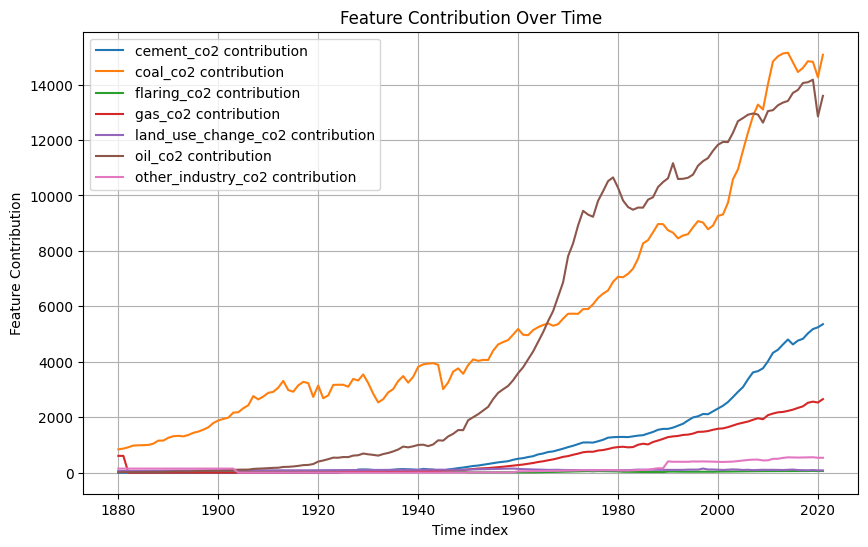

In [33]:
feature_contributions = X * coefficients

# Voeg de resultaten toe aan de DataFrame
for i, feature in enumerate(X.columns):
    df[f'{feature}_contribution'] = feature_contributions.iloc[:, i]

# Visualiseer de resultaten als een tijdsreeks per feature
plt.figure(figsize=(10, 6))
for feature in X.columns:
    plt.plot(df.index, df[f'{feature}_contribution'], label=f'{feature} contribution')

plt.xlabel('Time index')
plt.ylabel('Feature Contribution')
plt.title('Feature Contribution Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Owid features Importance

In [19]:
linear_feature_importances = pd.DataFrame(np.abs(linear_model.coef_), index=X.columns, columns=['importance'])
linear_feature_importances = linear_feature_importances.sort_values('importance', ascending=False)
print("Linear Regression Feature Importance:")
print(linear_feature_importances)

Linear Regression Feature Importance:
                     importance
cement_co2             3.203012
other_industry_co2     1.820055
oil_co2                1.148085
coal_co2               1.006306
gas_co2                0.335112
flaring_co2            0.148887
land_use_change_co2    0.021133


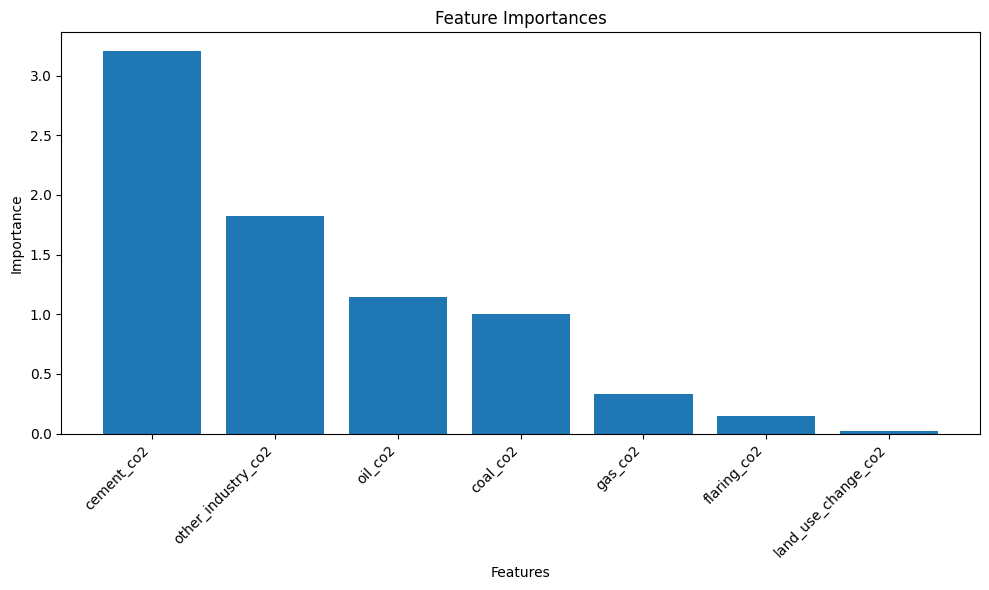

In [20]:
import matplotlib.pyplot as plt

# Features-dataframe

importance_values = linear_feature_importances['importance']
features = linear_feature_importances.index

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importance_values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

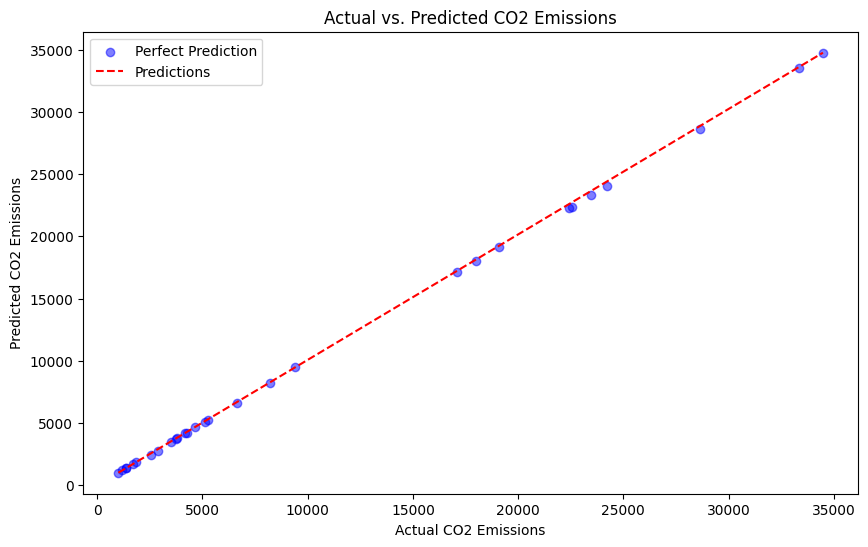

In [21]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.legend(['Perfect Prediction', 'Predictions'])
plt.show()

# Polynominal Regression baseline 

Polynomial regression is useful when there might be non-linear relationships between the features and CO2 emissions. It can capture more complex patterns in the data by introducing higher-order polynomial terms. 

This way we now have our original features and our features raised to the degree we have specified together in our data input and we are able to find both the linear as more complex/non-linear correlations. 

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Creation of our polynomial features 
# By raising our original features to a specific degree we will keep our original features, and besides them we will 
# have our polynomial features which are better at detecting non-linear correlations between our target variable (co2) and our input features 

degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
#X_val_poly = poly.transform(X_val)

In [24]:
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

#y_pred_val = poly_model.predict(X_val_poly)

In [25]:
evaluate_model(y_test, y_pred)
#evaluate_model(y_val, y_pred_val)

(MAE): 67.39555737464985
(RMSE): 107.18532911141763
(R2) score: 0.9998954817099688
(MAPE)) = 0.011725089854497803


# Feature Importance (with threshold) + Visualization Polynomial regressor

In [ ]:
poly_feature_names = poly.get_feature_names_out(X.columns)

In [ ]:
poly_feature_importances = pd.DataFrame(np.abs(poly_model.coef_), index=poly_feature_names, columns=['importance'])
poly_feature_importances = poly_feature_importances.sort_values('importance', ascending=False)

In [ ]:
# Setting a Threshold 

threshold = 0.15
poly_feature_importances_thresholded = poly_feature_importances[poly_feature_importances['importance'] > threshold]

print("Polynomial Regression Feature Importance:")
print(poly_feature_importances_thresholded)

In [ ]:
import matplotlib.pyplot as plt

# Features-dataframe

importance_values = poly_feature_importances_thresholded['importance']
features = poly_feature_importances_thresholded.index

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importance_values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.legend(['Perfect Prediction', 'Predictions'])
plt.show()

# Support Vector Regression Model 

SVR is a regression method that works well with both linear and non-linear relationships. It transforms the data into a higher-dimensional feature space and finds a hyperplane that best fits the data. It can be useful when the data has complex patterns.

In [29]:
from sklearn.svm import SVR

In [30]:
# creating our SVR model
# svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) 
svr_model = SVR(kernel='linear') 

In [31]:
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
#y_pred_val = svr_model.predict(X_val)

In [32]:
evaluate_model(y_test, y_pred)

(MAE): 22.90368382179255
(RMSE): 30.717982407854453
(R2) score: 0.999991415658645
(MAPE)) = 0.004247820457312859


In [ ]:
#evaluate_model(y_val, y_pred_val)

# Feature Importance + Visualization SVR

In [ ]:
support_vectors = svr_model.support_vectors_
dual_coefs = np.abs(svr_model.dual_coef_)
support_coeffs = np.sum(support_vectors * dual_coefs.T, axis=0)
svr_feature_importances = pd.DataFrame(support_coeffs, index=X_train.columns, columns=['importance'])
svr_feature_importances = svr_feature_importances.sort_values('importance', ascending=False)

In [ ]:
import matplotlib.pyplot as plt

# Features-dataframe

importance_values = svr_feature_importances['importance']
features = svr_feature_importances.index

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importance_values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.legend(['Perfect Prediction', 'Predictions'])
plt.show()

# Simple Anomaly Detection 

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05, random_state=42)
y_pred = clf.fit_predict(X)

In [ ]:
# Add the anomaly prediction result to the DataFrame
df['Anomaly'] = y_pred

# Plot the anomaly detection result (1: Normal, -1: Anomaly)
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['co2'], c=df['Anomaly'], cmap='viridis')
plt.xlabel('Data Index')
plt.ylabel('CO2 Emissions')
plt.title('Anomaly Detection using Isolation Forest')
plt.colorbar(label='Anomaly (1: Normal, -1: Anomaly)')
plt.show()

# Show rows with anomalies (latest row)
anomalies = df[df['Anomaly'] == -1]
print("Anomalies:")
print(anomalies)